# Colors Classification

First thing we do is obtain the data and extract the features we want to use. In this case we want the RGB values and the corresponding names.

In [2]:
import pandas as pd
import seaborn as sns

colors = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRBG/data/colors.csv", names= ['id','name', 'hex', 'R', 'G', 'B'])

features = colors[['R', 'G', 'B']]
names = colors['name']
print(colors)
print(features.shape)
print(names.shape)
print(features)

                       id                   name      hex    R    G    B
0      air_force_blue_raf   Air Force Blue (Raf)  #5d8aa8   93  138  168
1     air_force_blue_usaf  Air Force Blue (Usaf)  #00308f    0   48  143
2    air_superiority_blue   Air Superiority Blue  #72a0c1  114  160  193
3         alabama_crimson        Alabama Crimson  #a32638  163   38   56
4              alice_blue             Alice Blue  #f0f8ff  240  248  255
..                    ...                    ...      ...  ...  ...  ...
860         yellow_orange          Yellow Orange  #ffae42  255  174   66
861        yellow_process       Yellow (Process)  #ffef00  255  239    0
862            yellow_ryb           Yellow (Ryb)  #fefe33  254  254   51
863                zaffre                 Zaffre  #0014a8    0   20  168
864     zinnwaldite_brown      Zinnwaldite Brown  #2c1608   44   22    8

[865 rows x 6 columns]
(865, 3)
(865,)
       R    G    B
0     93  138  168
1      0   48  143
2    114  160  193
3    163

We see that we have a total of 865 different colors, much inferior to the total of 255^3 possibilities.

We can also get a grasp of the data distribution via a pairplot:

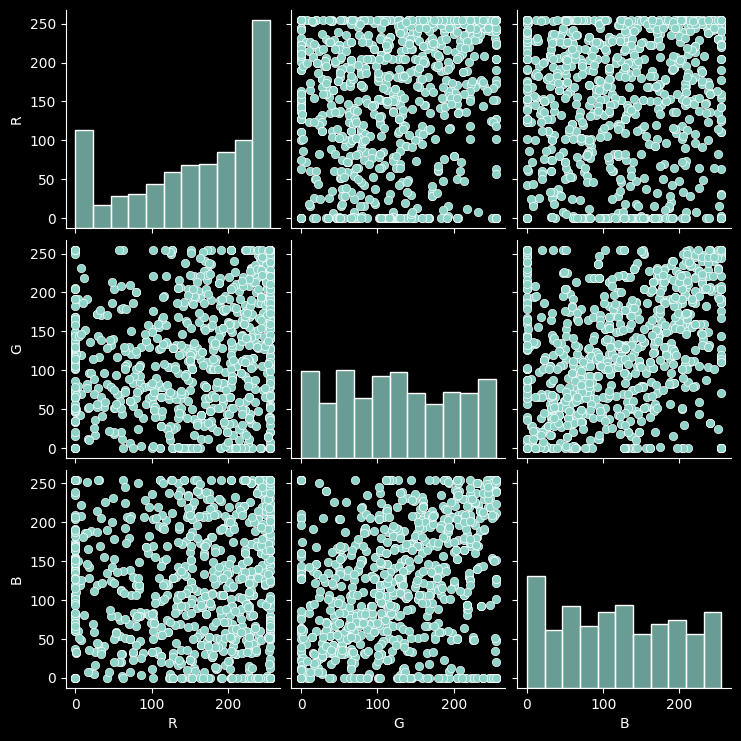

In [4]:
sns.pairplot(features)

Now let's train our K-Neighbor classifier based on the data

In [5]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(features, names)



KNeighborsClassifier(n_neighbors=3)

Let's ask for a couple of values to our model, to confirm it gives correct values

['Air Force Blue (Raf)' 'Dark Scarlet' 'Dark Jungle Green' 'Licorice']


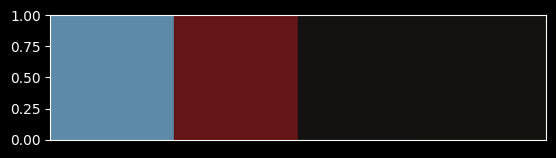

In [6]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt

# Create test data
test_data = {   
    'R': [93, 100, 20, 20],
    'G': [138, 21, 18, 18],
    'B': [168, 21, 16, 15]
}
df = pd.DataFrame(test_data)
print(neigh.predict(df))

# Print those same RGB values
rgb_values = [(93, 138, 168), (100, 21, 21), (20, 18, 16), (20, 18, 15)]
normalized_rgb_values = [(r / 255, g / 255, b / 255) for r, g, b in rgb_values]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot colored squares
for i, rgb in enumerate(normalized_rgb_values):
    rect = patches.Rectangle((i, 0), 1, 1, color=rgb)
    ax.add_patch(rect)

# Set x-axis limits and hide ticks
ax.set_xlim(0, len(normalized_rgb_values))
ax.set_xticks([])
ax.set_aspect('equal')

plt.show()

Seems about right. We also detected a boundary for which the model stops predicting 'Dark Jungle Green' and starts predicting 'Licorice' (the last two colors differ by a value of 1 in the blue axis). 